In [5]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [22]:
df = pd.read_csv("/data/data/whisky.csv")
df.drop("RowID", inplace=True, axis=1)


In [20]:
df.head()

,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude
0,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680
1,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,326340,842570
2,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320
3,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,141560,646220
4,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,355350,829140


In [25]:
X = df.drop(['Distillery', "Postcode", " Latitude", " Longitude"], axis=1)

In [26]:
X_scaled = StandardScaler().fit_transform(X)

In [27]:
X_scaled

array([[-0.07542547, -0.40765084,  0.54172898, ...,  0.31606376,
         0.25509887,  0.35566418],
       [ 1.00567291,  0.99466805, -0.62298833, ...,  1.91497456,
         1.54559904,  0.35566418],
       [-1.15652385,  0.99466805,  0.54172898, ...,  0.31606376,
         1.54559904,  0.35566418],
       ..., 
       [-2.23762223,  0.99466805, -0.62298833, ...,  0.31606376,
        -1.0354013 ,  0.35566418],
       [-0.07542547, -0.40765084, -0.62298833, ..., -1.28284703,
        -2.32590146, -1.99719114],
       [-0.07542547,  0.99466805, -1.78770563, ...,  0.31606376,
         0.25509887, -0.82076348]])

In [42]:
def find_k(X, k_range, sample_percent=1):
    import pandas as pd
    import numpy as np
    from sklearn.cluster import KMeans
    import matplotlib.pyplot as plt
    import scipy.spatial.distance as cdist
    from sklearn.metrics import pairwise_distances
    
    N = X.shape[0]
    sampleSize = N * sample_percent
    
    if sampleSize > 0:
        index = np.arange(np.shape(X)[0])
        np.random.shuffle(index)
        X = X[index, :]
        
    mean_distortions = []
    for k in k_range:
        kmeans_model = KMeans(n_clusters=k, init='k-means++', n_jobs=-1).fit(X)
        dist = pairwise_distances(X, kmeans_model.cluster_centers_, metric='euclidean')
        min_dist = np.min(dist, axis=1)
        mean = np.sum(min_dist) / N
        mean_distortions.append(mean)
        
    plt.plot(k_range, mean_distortions)
    plt.xlabel("K Value")
    plt.ylabel("Mean Distortion")
    plt.title("Elbow graph for mean distortion per K")
    plt.show()

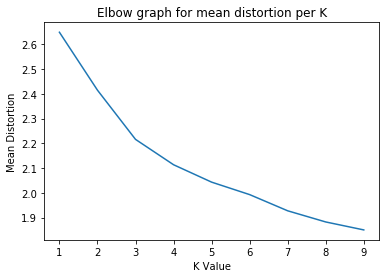

In [43]:
find_k(np.matrix(X), range(1, 10))